In [3]:
import pygame as pg
import pygame.draw as dw
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

pygame 2.6.0 (SDL 2.28.4, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
arr = np.zeros(10)
arr[3] = 1
arr[4] = 1
print(arr)
i = np.where(arr==1)
print(np.min(i[0]))

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
3


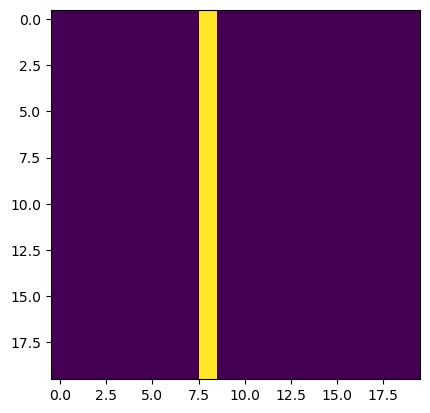

In [5]:
arr = np.zeros((20,20))
arr[:,8] = 1
plt.imshow(arr)

In [4]:
import pygame as pg
import pygame.draw as dw
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
pg.init()

n = 25

def maskLine(ini):
    mask = ini.copy().T
    for i in range(mask.shape[1]):
        iOne = np.min(np.where(mask[:,i] != 0)[0])
        mask[iOne:,i] = 1 # mask é 1 quando estamos num espaço proibido
    return mask

def findNormal(mask, y, x):
    neighbors = mask[y-n:y+2*n:n, x-n:x+2*n:n]
    # matrizes sobel
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # gradientes
    gx = np.sum(sobel_x * neighbors)
    gy = np.sum(sobel_y * neighbors)

    # vetor normal é paralelo ao gradiente
    normal = np.array([gx, gy])
    normal_magnitude = np.linalg.norm(normal)
    
    if normal_magnitude == 0:
        return np.array([0, 0])
    else:
        return -normal / normal_magnitude

def out(n, mask, r):
    vec = r.copy()
    while mask[int(vec[1]), int(vec[0])] != 0:
        vec += n
    return vec-r


def animate():
    L = 1000
    disp = pg.display.set_mode((L,L), pg.RESIZABLE)
    pg.display.set_caption("Teste #1")
    clk = pg.time.Clock()
    FPS = 60

    yL = 0.75*L
    R = L/100
    r = np.array([R,yL-R])
    v = np.array([100,-100])
    dw.line(disp, (255,255,255), (0,yL), (L,L-yL), 5)

    x3 = pg.surfarray.pixels3d(disp)
    ini = np.uint8(x3)[:,:,0]
    mask = maskLine(ini)
    dw.circle(disp, (255,255,255), (r[0], r[1]), R, 0)
    a = np.array([0,-10]) 

    points = [(r[0],r[1])]

    m = 1 # massa (kg)
    
    N = 300
    dt = 200/N
    
    e = 1

    for i in range(N):
        for event in pg.event.get():
            if event.type == pg.QUIT:
                return None
            if event.type == pg.VIDEORESIZE:
                disp = pg.display.set_mode((event.w, event.h),pg.RESIZABLE)
                L = np.min([event.h, event.w])
                yL = 0.75*L
        disp.fill((0,0,0)) # refresh fundo da pagina

        dw.line(disp, (255,255,255), (0,yL), (L,L-yL), 5)
        v = v - a*dt
        # na formula normal é +0.5at^2, mas no pygame o (0,0) é em cima!
        r0 = r.copy()
        r = r0 + v*dt - 0.5*a*dt*dt

        if int(r[0]) <= R or int(r[0]) >= L-R :
            v[0] *= -1
            r[0] *= -1
        if int(r[1]) <= R or int(r[1]) >= L-R :
            v[1] *= -1
            r[1] *= -1     
        if mask[int(r[1]), int(r[0])] == 1: # em r[] estou a usar [x,y], mas o array numpy mask usa [y,x] !
            n = findNormal(mask, int(r[1]), int(r[0]))
            phi = np.arctan2(v[1],v[0]) # angulo entre xx e trajetoria
            al = np.arccos(np.dot(n,v)/(np.linalg.norm(n)*np.linalg.norm(v)))
            vn = v * n
            vv = np.linalg.norm(v)
            if np.cos(al-phi) == 0:
                v[0] = vv*np.sqrt(e)*np.cos(phi)
            else:
                v[0] = vv*np.sqrt(e)*np.cos(al-phi)
            if np.sin(al-phi) == 0:
                v[1] = vv*np.sqrt(e)*np.sin(phi)
            else:
                v[1] = vv*np.sqrt(e)*(-np.sin(al-phi))
            vecOut = out(n, mask, r)
            r = r + vecOut   
            
        points.append((r[0],r[1]))
        dw.lines(disp, (100,100,100), False, points, 2)
        dw.circle(disp, (255,255,255), (r[0], r[1]), R, 0)
        pg.display.update()
        clk.tick(FPS)
        x3 = pg.surfarray.pixels3d(disp)
        array = np.uint8(x3)
        im = Image.fromarray(array)
        im = im.save(f'C:/Users/nunop/Desktop/funCode/test1/photos/{i:04d}.png', 'PNG')


animate()
pg.quit()



C:\Users\nunop\AppData\Local\Temp\ipykernel_20908\419127519.py:96: RuntimeWarning: invalid value encountered in scalar divide
  al = np.arccos(np.dot(n,v)/(np.linalg.norm(n)*np.linalg.norm(v)))


KeyboardInterrupt: 